# Clustering

$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\bb}{\mathbf{b}}$
$\newcommand{\bW}{\mathbf{W}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bp}{\mathbf{p}}$
$\newcommand{\RR}{\mathbb{R}}$



## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ipywidgets import interact, FloatLogSlider, FloatSlider

from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.utils import shuffle
from sklearn.metrics.cluster import contingency_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from urllib.request import urlretrieve

In [2]:
def plot_data(X, labels=None, centroids=None, previous_centroids=None, voronoi=False):
    colors = ['b', 'r', 'lime', 'm', 'c', 'y', 'orange', 'brown', 'pink', 'g']
    get_color = lambda labels: [colors[i % len(colors)] if i != -1 else 'black' for i in labels]
    from scipy.spatial import Voronoi, voronoi_plot_2d
    if voronoi and centroids is not None:
        voronoi_plot_2d(Voronoi(centroids), show_points=False, show_vertices=False);
    if labels is None:
        plt.scatter(X[:,0], X[:,1], marker='.')
    else:
        plt.scatter(X[:,0], X[:,1], marker='.', c=get_color(labels))
    if centroids is not None:
        if previous_centroids is not None:
            plt.scatter(previous_centroids[:,0], previous_centroids[:,1], c=get_color(range(centroids.shape[0])), 
                        marker='X', s=200, linewidths=2, edgecolors='gray')
            for k in range(centroids.shape[0]):
                M = np.r_[previous_centroids[[k]], centroids[[k]]]
                plt.plot(M[:,0], M[:,1], 'k-')
        plt.scatter(centroids[:,0], centroids[:,1], c=get_color(range(centroids.shape[0])), 
                    marker='X', s=200, linewidths=2, edgecolors='k')
    gap = (X.max(axis=0) - X.min(axis=0))*0.05
    plt.axis(np.r_[X.min(axis=0)-gap, X.max(axis=0)+gap][[0,2,1,3]])
    return

def gen_data():
    '''Generate several toy clustering datasets'''
    data = {}
    # Equal-variance blobs
    X = make_blobs(n_samples=300, n_features=2, centers=[[1, 1], [3, 3], [0.5, 3.8]], cluster_std=0.45, random_state=0)[0]
    X = X @ [[2, 0.2], [0.1, 1]]
    data['blobs'] = X
    # Concentric circles
    X = make_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=0)[0]
    X = np.r_[2*X, 3*make_circles(n_samples=500, noise=0.05, factor=1-1e-6, random_state=0)[0]]
    data['circles'] = X
    # Elongated ellipses
    rot = lambda theta: np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
    X = make_blobs(n_samples=1500, n_features=2, centers=[[0.5, 0], [-1, 1], [1, 2]], cluster_std=0.28, random_state=0)[0]
    X = X @ [[6, 0], [0, 1]] @ rot(np.pi/4)
    data['ellipses'] = X
    # Unequal-variance blobs
    X = np.r_[np.random.RandomState(0).normal(0, 3, size=(400, 2)) @ [[1, 0], [0, 2]],
              [8, 5] + np.random.RandomState(1).normal(0, 0.5, size=(400, 2)),
              [-8, -10] + np.random.RandomState(2).normal(0, 1, size=(400, 2)) @ [[1, 0], [0, 4]]]
    data['blobs2'] = X    
    return data

# K-Means

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

## Conceitos básicos

In [3]:
data = gen_data()

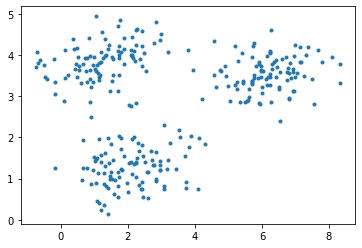

In [4]:
X = data['blobs']
plot_data(X)

Number of iterations: 4
Inertia: 308.908


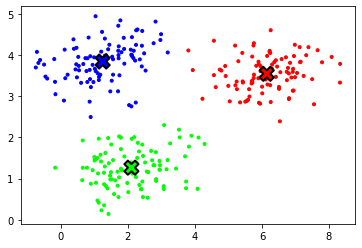

In [5]:
K = 3
model = KMeans(K, random_state=0)
model.fit(X)
print('Number of iterations:', model.n_iter_)
print('Inertia: {:g}'.format(model.inertia_))
plot_data(X, model.labels_, model.cluster_centers_)

O valor da função custo (soma dos quadrados de todas as distâncias aos respectivos centros dos clusters) é chamado no `sklearn` de `inertia`.

In [6]:
model.cluster_centers_

array([[1.2486912 , 3.84078983],
       [6.14275195, 3.54196941],
       [2.10556313, 1.26416421]])

In [7]:
model.labels_

array([2, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2,
       1, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0,
       0, 2, 1, 2, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0,
       0, 1, 2, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 1, 2, 0, 1, 0, 2, 0,
       2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0, 2,
       1, 1, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 0,
       2, 1, 0, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0,
       1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0])

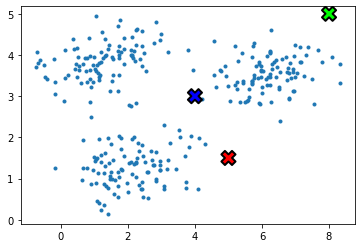

In [8]:
initial_centers = np.array([[4, 3], [5, 1.5], [8, 5]])
plot_data(X, None, initial_centers)

Number of iterations: 8
Inertia: 308.908


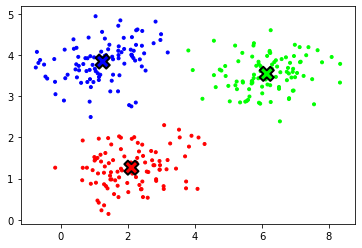

In [9]:
K = 3
model = KMeans(K, init=initial_centers, n_init=1)
#model = KMeans(K, init=initial_centers, n_init=1, verbose=True)
model.fit(X)
print('Number of iterations:', model.n_iter_)
print('Inertia: {:g}'.format(model.inertia_))
plot_data(X, model.labels_, model.cluster_centers_)

## Implementação própria

Como o `sklearn` não fornece os resultados obtidos a cada iteração, para entender o funcionamento do algoritmo precisamos realizar nossa própria implementação.

**Obs:** Na implementação abaixo (ao contrário do que está nos slides), a primeira parte da iteração corresponde ao cálculo dos centróides (a partir dos rótulos) e a segunda parte da iteração corresponde ao cálculo dos rótulos (a partir dos centróides).

In [10]:
def update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        centroids[k] = X[labels == k].mean(axis=0)
    return centroids

def update_labels(X, centroids):
    labels = ((X[:, None] - centroids[None, :])**2).sum(axis=2).argmin(axis=1)
    return labels

def compute_inertia(X, centroids, labels):
    if labels is None:
        return np.nan
    K = centroids.shape[0]
    inertia = 0
    for k in range(K):
        inertia += ((X[labels == k] - centroids[k])**2).sum()
    return inertia

def k_means(X, initial_centers, max_iter=300):
    centroids = initial_centers
    labels = None
    history = []
    K = centroids.shape[0]
    for i in range(max_iter):
        if i > 0:
            centroids = update_centroids(X, labels, K)
        previous_labels = labels
        labels = update_labels(X, centroids)
        history.append((centroids, labels))
        if np.all(labels == previous_labels):
            break
    return centroids, labels, history

In [11]:
centroids, labels, result = k_means(X, initial_centers)
result = [(None, None)] + result

@interact(i=(0,len(result)-1, 0.5))
def _(i=0):
    first_half = (i % 1 == 0.5)
    i = int(i)
    if first_half:
        previous_centroids, labels = result[i]
        centroids, _ = result[i+1]
        plot_data(X, labels, centroids, previous_centroids)
        if i == 0:
            plt.title('Initial centers')
        else:
            plt.title('Iteration {}: Update centers'.format(i))
    else:
        centroids, labels = result[i]
        plot_data(X, labels, centroids, voronoi=True)
        if i == 0:
            plt.title('Original data')
        else:
            plt.title('Iteration {}: Update labels'.format(i))
    inertia = compute_inertia(X, centroids, labels)
    print('Inertia: {:g}'.format(inertia))

interactive(children=(FloatSlider(value=0.0, description='i', max=8.0, step=0.5), Output()), _dom_classes=('wi…

## Impacto da inicialização

In [12]:
X = make_blobs(n_samples=1000, n_features=2, centers=10, cluster_std=0.5, random_state=2)[0]

@interact(K=(1, 10), init=['random', 'k-means++'], n_init=(1,10), random_state=(0,100), verbose=False)
def _(K=1, init='random', n_init=1, random_state=0, verbose=False):
    model = KMeans(n_clusters=K, init=init, n_init=n_init, random_state=random_state, verbose=verbose)
    model.fit(X)
    print('Number of iterations:', model.n_iter_)
    print('Inertia: {:g}'.format(model.inertia_))
    plot_data(X, model.labels_, model.cluster_centers_)

interactive(children=(IntSlider(value=1, description='K', max=10, min=1), Dropdown(description='init', options…

In [13]:
%%time
runs = 100
n_inits = np.arange(1, 6)
inertia = {'random': np.zeros(len(n_inits)), 'k-means++': np.zeros(len(n_inits))}
for init in inertia:
    for i, n_init in enumerate(n_inits):
        inertia[init][i] = np.mean([KMeans(10, n_init=n_init, init=init, random_state=r).fit(X).inertia_ for r in range(runs)])

Wall time: 16.6 s


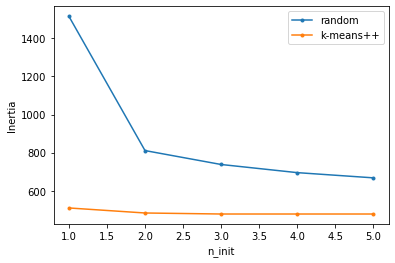

In [14]:
plt.plot(n_inits, inertia['random'], '.-', label='random')
plt.plot(n_inits, inertia['k-means++'], '.-', label='k-means++')
plt.xlabel('n_init')
plt.ylabel('Inertia')
plt.legend()
plt.show()

## Outros conjuntos de dados

In [15]:
@interact(dataset=data.keys(), K=(1, 10), random_state=(0, 100), verbose=False)
def _(dataset, K=3, random_state=0, verbose=False):
    X = data[dataset]
    model = KMeans(n_clusters=K, random_state=random_state, verbose=verbose)
    model.fit(X)
    print('Number of iterations:', model.n_iter_)
    print('Inertia: {:g}'.format(model.inertia_))
    plt.figure(figsize=(4, 4))
    plot_data(X, model.labels_, model.cluster_centers_)

interactive(children=(Dropdown(description='dataset', options=('blobs', 'circles', 'ellipses', 'blobs2'), valu…

In [16]:
# Inertia for optimal clustering on the circles dataset:
500*(1**2 + 2**2 + 3**2)

7000

# DBSCAN

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

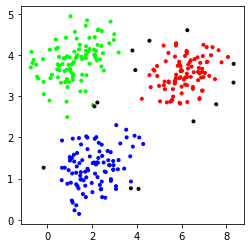

In [17]:
X = data['blobs']
model = DBSCAN(eps=0.5, min_samples=5)
model.fit(X)
plt.figure(figsize=(4, 4))
plot_data(X, model.labels_)

In [18]:
@interact(dataset=data.keys(), eps=(0.1, 2, 0.05), min_samples=(1,10), shadow=['none', 'core samples', 'noncore samples'])
def _(dataset, eps=0.5, min_samples=5, shadow='none'):
    X = data[dataset]
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(X)
    print('Number of clusters found:', np.max(model.labels_)+1)
    print(f'Proportion of outliers: {np.sum(model.labels_ == -1)/len(X):.1%}')
    plt.figure(figsize=(4, 4))
    plot_data(X, model.labels_)
    if shadow != 'none':
        core = np.isin(range(len(X)), model.core_sample_indices_)
        if shadow == 'noncore samples':
            core = ~core
        plt.plot(X[core, 0], X[core, 1], 'ko', mfc='gray', markersize=8, mec='none', zorder=-1);

interactive(children=(Dropdown(description='dataset', options=('blobs', 'circles', 'ellipses', 'blobs2'), valu…

# Exemplo: Quantização de Cores usando K-Means

Downloaded: araraa.jpg
Original dtype: uint8
Image shape: (340, 510, 3)
Dataset shape: (173400, 3)


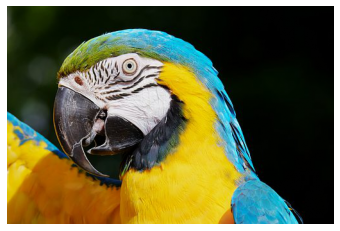

In [19]:
url = 'https://www.stoodi.com.br/wp-content/uploads/2019/02/araraa.jpg'
filename = urlretrieve(url, url.split('/')[-1])[0]
print('Downloaded:', filename)
image = plt.imread(filename)
print('Original dtype:', image.dtype)
image = image/255
plt.imshow(image)
plt.axis('off');
print('Image shape:', image.shape)
X = image.reshape(-1, 3)
print('Dataset shape:', X.shape)

- O conjunto de dados é formado pelas cores dos pixels da imagem no espaço RGB, i.e., cada pixel da imagem é interpretado como uma amostra num espaço tridimensional.
- Aplicando o K-means, podemos agrupar as cores dos pixels da imagem em clusters, correspondendo a uma compressão de 3\*8 = 24 bits por pixel para $\log_2(K)$ bits por pixel.
- Na reconstrução, a cor de cada pixel da imagem é substituída pelo centróide do cluster correspondente, o que minimiza o erro quadrático.

In [20]:
%%time 
K = 16
model = KMeans(n_clusters=K, n_init=1, random_state=0).fit(X)
#labels = model.predict(X)
labels = model.labels_
centers = model.cluster_centers_
print('Inertia: {:g}'.format(model.inertia_))
image_rec = centers[labels].reshape(image.shape)

Inertia: 1070.47
Wall time: 884 ms


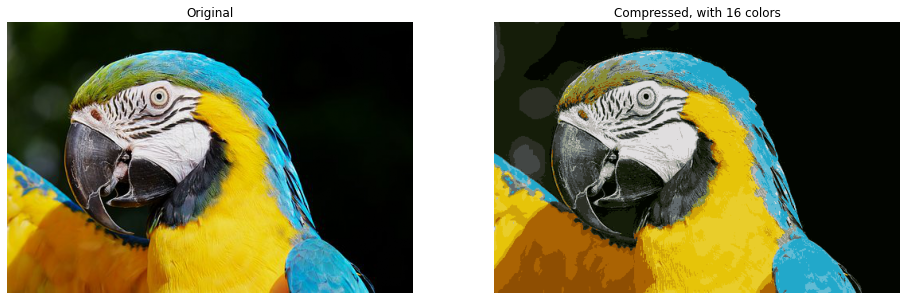

In [21]:
plt.figure(figsize=(16, 16))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original')
plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(image_rec)
plt.title('Compressed, with {} colors'.format(K))
plt.axis('off');

Downloaded: baltimore-oriole.jpg
Image shape: (439, 780, 3)
Dataset shape: (342420, 3)


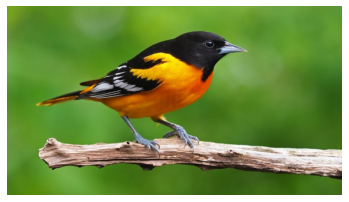

In [22]:
url = 'https://i.cbc.ca/1.5288498.1568827928!/fileImage/httpImage/image.jpg_gen/derivatives/16x9_780/baltimore-oriole.jpg'
filename = urlretrieve(url, url.split('/')[-1])[0]
print('Downloaded:', filename)
image = plt.imread(filename)/255
plt.imshow(image)
plt.axis('off');
print('Image shape:', image.shape)
X = image.reshape(-1, 3)
print('Dataset shape:', X.shape)

Inertia: 8186.83


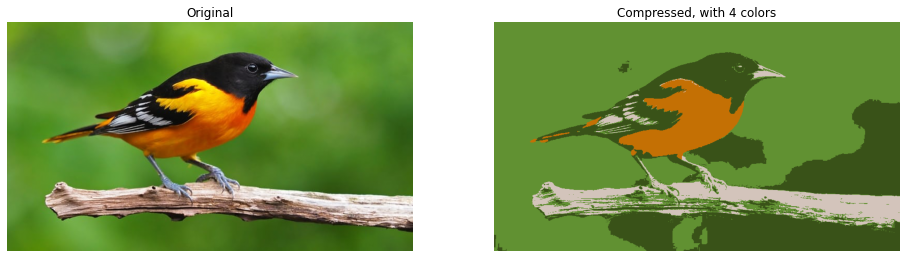

In [23]:
K = 4
model = KMeans(n_clusters=K, n_init=1, random_state=0).fit(X)
#labels = model.predict(X)
labels = model.labels_
centers = model.cluster_centers_
print('Inertia: {:g}'.format(model.inertia_))
image_rec = centers[labels].reshape(image.shape)

plt.figure(figsize=(16, 16))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original')
plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(image_rec)
plt.title('Compressed, with {} colors'.format(K))
plt.axis('off');

# Exemplo: Clusterizando o MNIST

O próximo conjunto de dados é o MNIST e o objetivo é avaliar o desempenho do K-means para encontrar grupos de dígitos similares. Nesse caso, o espaço de atributos será formado pelos 784 pixels da imagem, um problema de dimensionalidade elevada. Para reduzir a complexidade, usaremos apenas um subconjunto das amostras.

In [24]:
from tensorflow.keras.datasets import mnist
from sklearn.utils import shuffle

(X, y) = mnist.load_data()[0]
X, y = shuffle(X, y, n_samples=10000, random_state=0)
X = X.reshape(X.shape[0], -1)/255
print(X.shape, y.shape)

(10000, 784) (10000,)


Considere que o K-means será usado com K=10. Idealmente o algoritmo deve encontrar 10 clusters correspondendo exatamente aos 10 dígitos. Como os rótulos são conhecidos, é possível medir a acurácia do agrupamento tratando-o como um problema de classificação---a menos de uma permutação, pois o algoritmo de clustering não tem como adivinhar quais são os rótulos certos. 

In [25]:
%%time
model = KMeans(10, n_init=5, random_state=0).fit(X)
labels = model.labels_
centroids = model.cluster_centers_

Wall time: 2.62 s


Centroids:


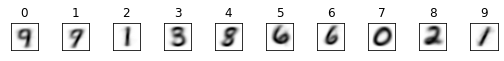

Clusters (first 8 images from each cluster):


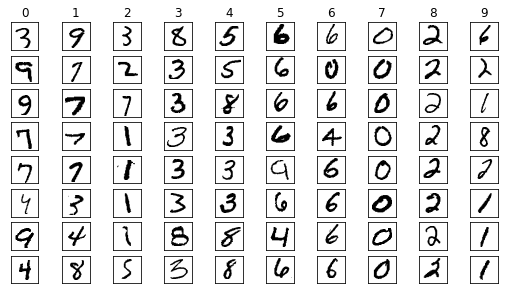

In [26]:
print('Centroids:')
plt.figure(figsize=(9, 0.5))
for k in range(10):
    plt.subplot(1, 10, k+1)
    img = centroids[k].reshape(28, 28)
    plt.imshow(img, cmap='gray_r')
    plt.title(k)
    plt.xticks([]);
    plt.yticks([]);
plt.show()

rows = 8
print(f'Clusters (first {rows} images from each cluster):')
plt.figure(figsize=(9, 0.6*rows))
for i in range(rows):
    for k in range(10):
        plt.subplot(rows, 10, 10*i+k+1)
        img = X[labels == k][i].reshape(28, 28)
        plt.imshow(img, cmap='gray_r')
        if i == 0:
            plt.title(k)
        plt.xticks([]);
        plt.yticks([]);
plt.show()
#print('Cluster sizes:')
#print(''.join([f'{p:7}' for p in np.unique(labels, return_counts=True)[1]])[2:])

Para fazer uma avaliação justa, podemos dar a um cluster o rótulo correspondente ao dígito que aparece com maior frequência no cluster. Por exemplo, se 95% das amostras do cluster 7 são dígitos 0, então atribuímos a todas as amostras desse cluster o rótulo 0, e assim por diante para todos os clusters (mesmo que haja repetição de rótulos atribuídos). Chamaremos de *acurácia do agrupamento* (*cluster accuracy*) a acurácia resultante desse procedimento.

In [27]:
from sklearn.metrics.cluster import contingency_matrix

M = contingency_matrix(y, labels)
print('Contingency matrix:\n')
print(M)

Contingency matrix:

[[  1   2   0  35  37  19 101 796   4   6]
 [  3   1 648   0   0   0   3   0   1 497]
 [ 27  14  49  66  19  20  17  12 687  62]
 [ 33  10  53 592 244   0  13   3  32   5]
 [444 313  14   0   0 100  31   0   2  40]
 [ 80  43  20 284 275   5  57   8   1 118]
 [  4   2  17   5   3 409 550  10   1  17]
 [325 598  52   1   1   1   0   3  10  49]
 [ 44  48  42 237 495   8  13   4  13  78]
 [510 397  37  12   8  25   3   3   0  18]]


- Quando a matriz de contingência é declarada com a notação `contingency_matrix(true_labels, cluster_labels)`, o elemento $(i,k)$ indica o número de amostras de rótulo verdadeiro $i$ que foram alocadas ao cluster $k$. Se a notação for invertida, a matriz fica transposta.

In [28]:
best_map = M.argmax(axis=0)
print('best_map:', best_map)

best_map: [9 7 1 3 8 6 6 0 2 1]


In [29]:
y_pred = best_map[labels]
acc = np.mean(y == y_pred)
print('Cluster accuracy: {:.2%}'.format(acc))

Cluster accuracy: 57.82%


Centroids:


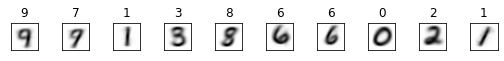

Clusters (first 8 images from each cluster):


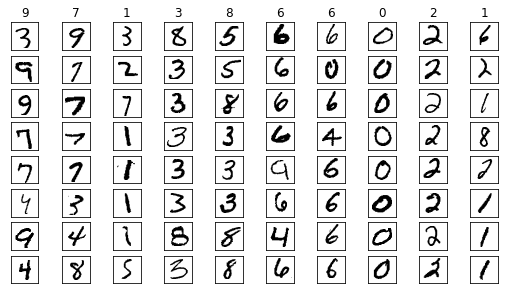

Accuracy within each cluster:
 34.7%  41.9%  69.5%  48.1%  45.7%  69.7%  69.8%  94.9%  91.5%  55.8%

Cluster sizes:
 1471   1428    932   1232   1082    587    788    839    751    890


In [30]:
print('Centroids:')
plt.figure(figsize=(9, 0.5))
for k in range(10):
    plt.subplot(1, 10, k+1)
    img = centroids[k].reshape(28, 28)
    plt.imshow(img, cmap='gray_r')
    plt.title(best_map[k])
    plt.xticks([]);
    plt.yticks([]);
plt.show()

rows = 8
print(f'Clusters (first {rows} images from each cluster):')
plt.figure(figsize=(9, 0.6*rows))
for i in range(rows):
    for k in range(10):
        plt.subplot(rows, 10, 10*i+k+1)
        img = X[labels == k][i].reshape(28, 28)
        plt.imshow(img, cmap='gray_r')
        if i == 0:
            plt.title(best_map[k])
        plt.xticks([]);
        plt.yticks([]);
plt.show()
accs = [M[best_map[k], k] for k in range(10)]/M.sum(axis=0)
print('Accuracy within each cluster:')
print(''.join([f'{a:7.1%}' for a in accs])[1:])
print('')
print('Cluster sizes:')
print(''.join([f'{s:7}' for s in M.sum(axis=0)])[2:])

Centroids:


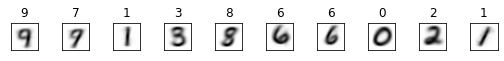

Cluster 0 contains: 9 (34.7%), 4 (30.2%), 7 (22.1%)
Cluster 1 contains: 7 (41.9%), 9 (27.8%), 4 (21.9%)
Cluster 2 contains: 1 (69.5%), 3 ( 5.7%), 7 ( 5.6%)
Cluster 3 contains: 3 (48.1%), 5 (23.1%), 8 (19.2%)
Cluster 4 contains: 8 (45.7%), 5 (25.4%), 3 (22.6%)
Cluster 5 contains: 6 (69.7%), 4 (17.0%), 9 ( 4.3%)
Cluster 6 contains: 6 (69.8%), 0 (12.8%), 5 ( 7.2%)
Cluster 7 contains: 0 (94.9%), 2 ( 1.4%), 6 ( 1.2%)
Cluster 8 contains: 2 (91.5%), 3 ( 4.3%), 8 ( 1.7%)
Cluster 9 contains: 1 (55.8%), 5 (13.3%), 8 ( 8.8%)


In [31]:
print('Centroids:')
plt.figure(figsize=(9, 0.5))
for k in range(10):
    plt.subplot(1, 10, k+1)
    img = centroids[k].reshape(28, 28)
    plt.imshow(img, cmap='gray_r')
    plt.title(best_map[k])
    plt.xticks([]);
    plt.yticks([]);
plt.show()

for k in range(10):
    args = M[:, k].argsort()[::-1][:3]
    print(f'Cluster {k} contains: ' + ', '.join([f'{i} ({M[i, k]/M[:, k].sum():5.1%})' for i in args]))